# INSY695 Group Project

## Step 2: Data Exploration

After aggregating all the datasets, we then start exploring the data.

<b>Load packages</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import shap

## 2.1 <b>Import Dataset</b>

In [2]:
data = pd.read_csv("period1_combined.csv")

## 2.2 <b>Check How Data Look Like</b>

In [3]:
data.shape # 52610 rows, 26 columns

(52610, 26)

In [4]:
data.head()

,Unnamed: 0,game_id,HoA,won,settled_in,head_coach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,...,Giveaways,Missed Shots,Penalities,#Won Faceoffs,team_id,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,0,2016020045,away,False,REG,Dave Hakstol,2.00,1.33,0.67,50.9,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,1,2016020045,home,True,REG,Joel Quenneville,2.67,1.00,0.67,49.1,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2,2017020812,away,True,OT,Randy Carlyle,2.00,1.00,0.33,43.8,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,3,2017020812,home,False,OT,Phil Housley,2.67,0.67,0.33,56.2,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,4,2015020314,away,True,REG,Patrick Roy,3.00,1.00,0.33,45.7,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No


In [5]:
data.describe()

,Unnamed: 0,game_id,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,Shots,Goals,Takeaways,Hits,Blocked Shots,Giveaways,Missed Shots,Penalities,#Won Faceoffs,team_id,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
count,52610.000000,5.261000e+04,52602.000000,52602.000000,52602.000000,30462.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52582.000000,52582.000000,52582.000000,52582.000000,52582.00000
mean,26304.500000,2.010765e+09,3.918255,1.231235,0.221774,49.967179,7.018628,0.971964,1.899107,6.911785,3.658810,2.593898,2.899810,1.742197,7.335069,16.874862,329.537617,269.212202,26.704262,33.62115
std,15187.343168,6.073510e+06,3.009886,0.623485,0.271154,7.326322,7.910037,1.198563,2.740545,8.006232,4.461539,3.661681,3.674668,1.492722,7.853894,11.188100,14.260545,30.446479,13.655711,17.22695
min,0.000000,2.000020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,133.330000,133.330000,0.000000,0.00000
25%,13152.250000,2.006020e+09,2.000000,0.670000,0.000000,45.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,323.910000,250.760000,17.780000,22.22000
50%,26304.500000,2.011021e+09,3.330000,1.000000,0.000000,50.000000,6.000000,1.000000,1.000000,5.000000,2.000000,1.000000,2.000000,2.000000,7.000000,16.000000,327.310000,270.960000,26.300000,33.17000
75%,39456.750000,2.016030e+09,5.000000,1.670000,0.330000,54.800000,12.000000,2.000000,3.000000,12.000000,6.000000,4.000000,5.000000,2.000000,12.000000,24.000000,331.480000,288.940000,35.560000,44.44000
max,52609.000000,2.019041e+09,71.000000,5.330000,2.330000,79.200000,54.000000,12.000000,26.000000,60.000000,34.000000,30.000000,34.000000,16.000000,42.000000,90.000000,827.260000,762.870000,115.480000,146.30000


## 2.3 Check Missing Values

In [6]:
data.isnull().sum()

Unnamed: 0                    0
game_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
startRinkSide              2392
Shots                         0
Goals                         0
Takeaways                     0
Hits                          0
Blocked Shots                 0
Giveaways                     0
Missed Shots                  0
Penalities                    0
#Won Faceoffs                 0
team_id                      28
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalie_replacement           35
dtype: int64

## 2.4 <b>Remove Irrelevant Column</b>

In [7]:
data = data.drop(columns='Unnamed: 0')

In [8]:
data.head()

,game_id,HoA,won,settled_in,head_coach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,startRinkSide,...,Giveaways,Missed Shots,Penalities,#Won Faceoffs,team_id,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,2016020045,away,False,REG,Dave Hakstol,2.00,1.33,0.67,50.9,left,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,2016020045,home,True,REG,Joel Quenneville,2.67,1.00,0.67,49.1,left,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2017020812,away,True,OT,Randy Carlyle,2.00,1.00,0.33,43.8,right,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,2017020812,home,False,OT,Phil Housley,2.67,0.67,0.33,56.2,right,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,2015020314,away,True,REG,Patrick Roy,3.00,1.00,0.33,45.7,left,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No


## 2.5 <b>Check Variable Types</b>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   HoA                     52610 non-null  object 
 2   won                     52610 non-null  bool   
 3   settled_in              52610 non-null  object 
 4   head_coach              52582 non-null  object 
 5   pim                     52602 non-null  float64
 6   powerPlayOpportunities  52602 non-null  float64
 7   powerPlayGoals          52602 non-null  float64
 8   faceOffWinPercentage    30462 non-null  float64
 9   startRinkSide           50218 non-null  object 
 10  Shots                   52610 non-null  float64
 11  Goals                   52610 non-null  float64
 12  Takeaways               52610 non-null  float64
 13  Hits                    52610 non-null  float64
 14  Blocked Shots           52610 non-null

<b>Generate a HTML report</b>

In [10]:
#import pandas_profiling
#profile = data.profile_report(title='Pandas Profiling Report')

#profile.to_file(output_file="profile_report_output.html")

# 2.6 <b>Examine Data Distribution of Each Variable<b/>

In this section, we use histograms to look at the distribution of numeric variables. For categorical variables, we count the frequency of each value.

In [11]:
data["HoA"].value_counts()

away    26305
home    26305
Name: HoA, dtype: int64

In [12]:
data["won"].value_counts()

False    26947
True     25663
Name: won, dtype: int64

In [13]:
data["settled_in"].value_counts()

REG    40306
OT     12256
tbc       48
Name: settled_in, dtype: int64

In [14]:
data["head_coach"].value_counts()

Barry Trotz         1804
Joel Quenneville    1599
John Tortorella     1563
Claude Julien       1500
Mike Babcock        1475
                    ... 
Al Arbour              1
Dan Lacroix            1
Cap Raeder             1
Terry O'Reilly         1
Martin Raymond         1
Name: head_coach, Length: 146, dtype: int64

<AxesSubplot:>

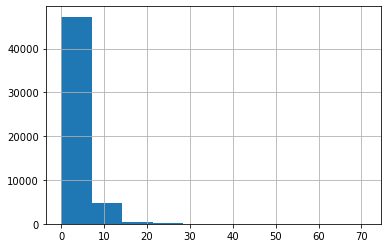

In [15]:
data["pim"].hist()

<AxesSubplot:>

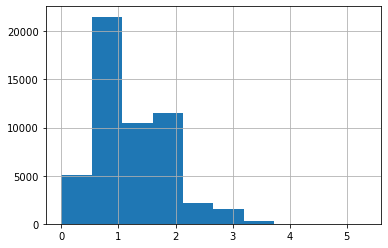

In [16]:
data["powerPlayOpportunities"].hist()

<AxesSubplot:>

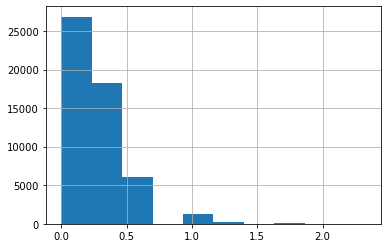

In [17]:
data["powerPlayGoals"].hist()

<AxesSubplot:>

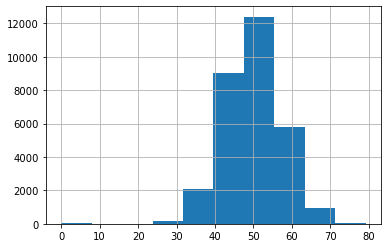

In [18]:
data["faceOffWinPercentage"].hist()

In [19]:
data["startRinkSide"].value_counts()

left     26852
right    23366
Name: startRinkSide, dtype: int64

<AxesSubplot:>

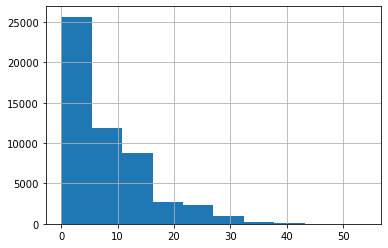

In [20]:
data["Shots"].hist()

<AxesSubplot:>

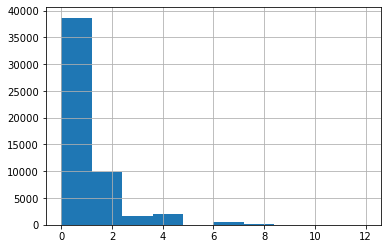

In [21]:
data["Goals"].hist()

<AxesSubplot:>

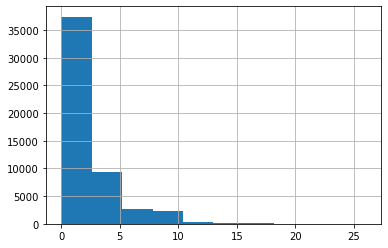

In [22]:
data["Takeaways"].hist()

<AxesSubplot:>

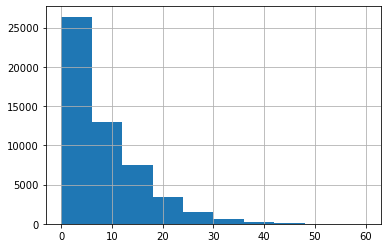

In [23]:
data["Hits"].hist()

<AxesSubplot:>

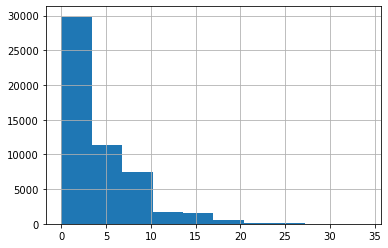

In [24]:
data["Blocked Shots"].hist()

<AxesSubplot:>

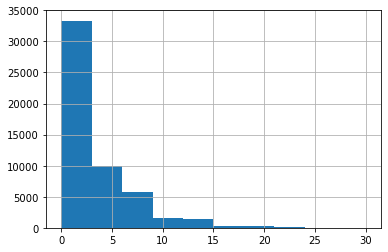

In [25]:
data["Giveaways"].hist()

<AxesSubplot:>

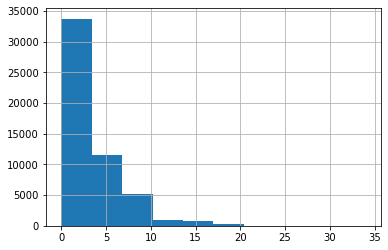

In [26]:
data["Missed Shots"].hist()

<AxesSubplot:>

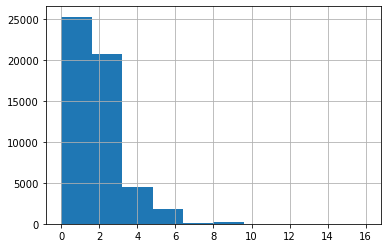

In [27]:
data = data.rename(columns={"Penalities": "Penalties"})
data["Penalties"].hist()

<AxesSubplot:>

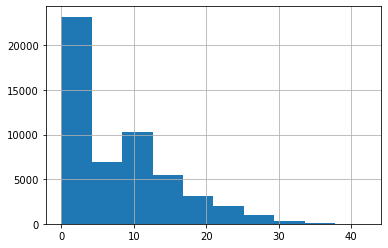

In [28]:
data["#Won Faceoffs"].hist()

<AxesSubplot:>

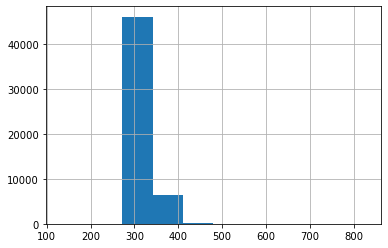

In [29]:
data["timeOnIce"].hist()

<AxesSubplot:>

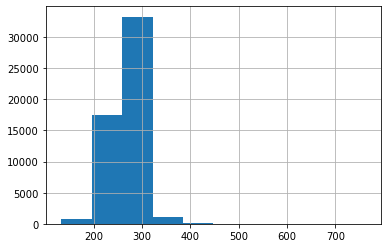

In [30]:
data["evenTimeOnIce"].hist()

<AxesSubplot:>

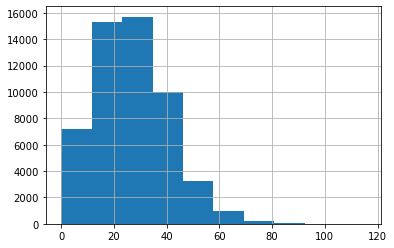

In [31]:
data["shortHandedTimeOnIce"].hist()

<AxesSubplot:>

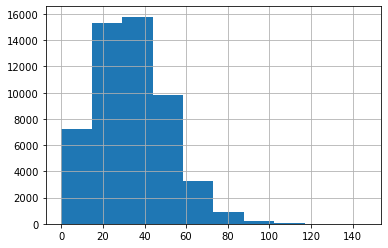

In [32]:
data["powerPlayTimeOnIce"].hist()

In [33]:
data["goalie_replacement"].value_counts()

No     48498
Yes     4077
Name: goalie_replacement, dtype: int64

## 2.7 <b>Check Outliers for Numeric Values</b>

In this section, we use boxplots to observe how many outliers there are for each variable.

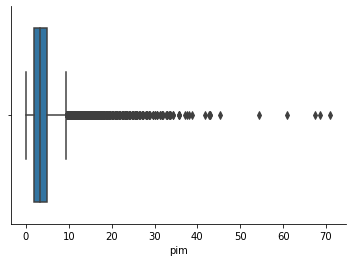

In [34]:
sns.boxplot(data['pim']) 
sns.despine()

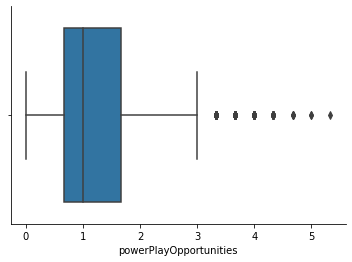

In [35]:
sns.boxplot(data['powerPlayOpportunities']) 
sns.despine()

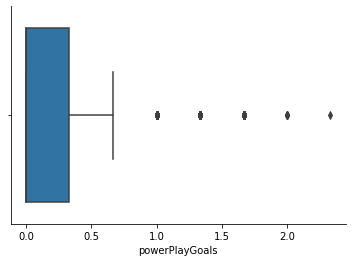

In [36]:
sns.boxplot(data['powerPlayGoals']) 
sns.despine()

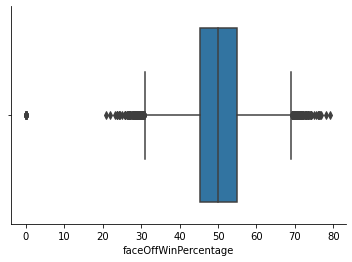

In [37]:
sns.boxplot(data['faceOffWinPercentage']) 
sns.despine()

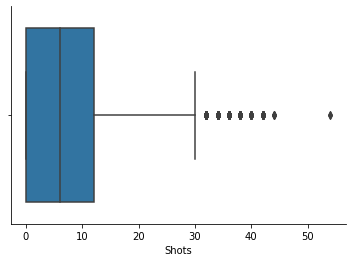

In [38]:
sns.boxplot(data['Shots']) 
sns.despine()

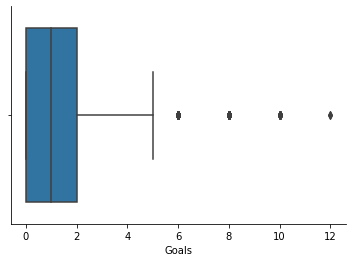

In [39]:
sns.boxplot(data['Goals']) 
sns.despine()

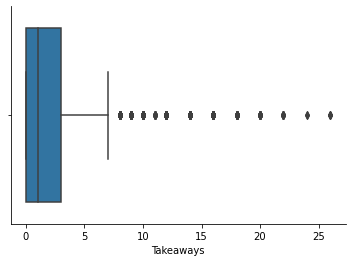

In [40]:
sns.boxplot(data['Takeaways']) 
sns.despine()

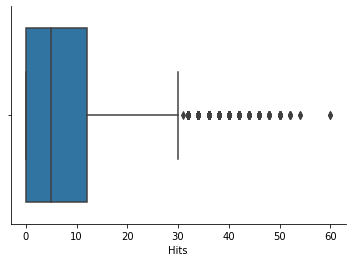

In [41]:
sns.boxplot(data['Hits']) 
sns.despine()

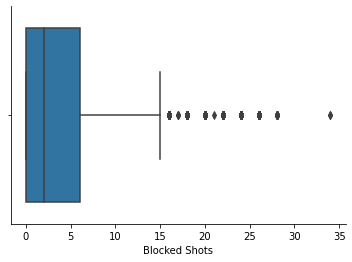

In [42]:
sns.boxplot(data['Blocked Shots']) 
sns.despine()

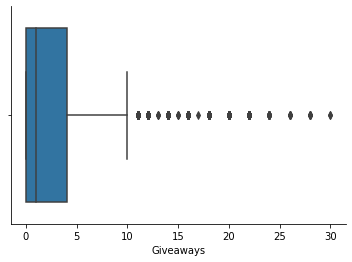

In [43]:
sns.boxplot(data['Giveaways']) 
sns.despine()

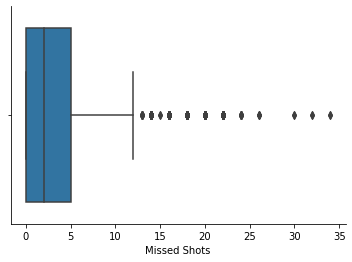

In [44]:
sns.boxplot(data['Missed Shots']) 
sns.despine()

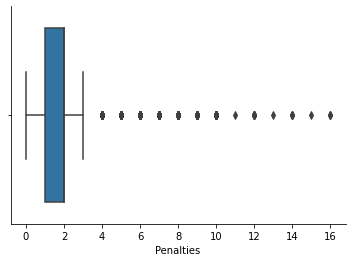

In [45]:
sns.boxplot(data['Penalties']) 
sns.despine()

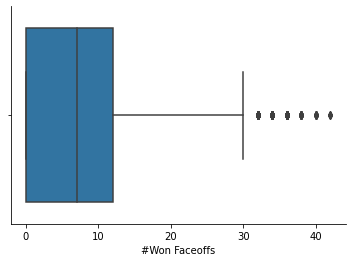

In [46]:
sns.boxplot(data['#Won Faceoffs']) 
sns.despine()

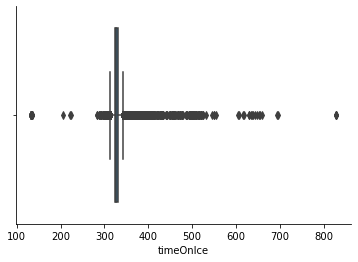

In [47]:
sns.boxplot(data['timeOnIce']) 
sns.despine()

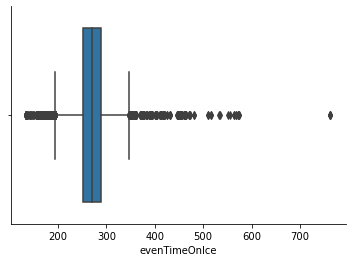

In [48]:
sns.boxplot(data['evenTimeOnIce']) 
sns.despine()

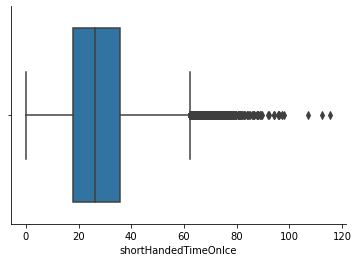

In [49]:
sns.boxplot(data['shortHandedTimeOnIce']) 
sns.despine()

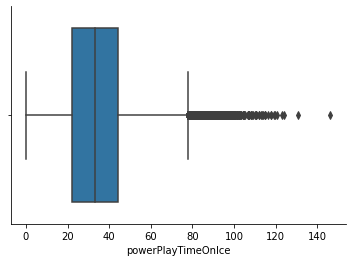

In [50]:
sns.boxplot(data['powerPlayTimeOnIce']) 
sns.despine()

## 2.8 <b>Check Relationships between Variables</b>

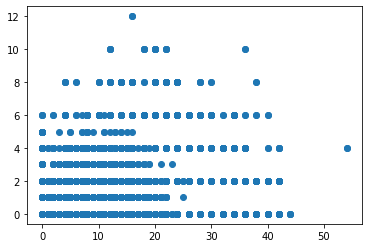

In [51]:
plt.scatter(data['Shots'], data['Goals'])

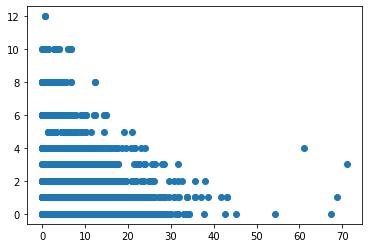

In [52]:
plt.scatter(data['pim'], data['Goals'])

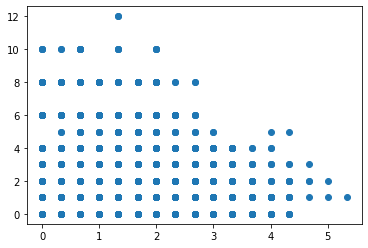

In [53]:
plt.scatter(data['powerPlayOpportunities'], data['Goals'])

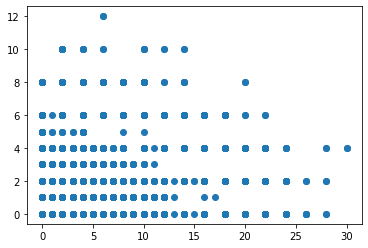

In [54]:
plt.scatter(data['Giveaways'], data['Goals'])

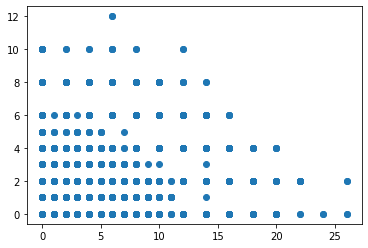

In [55]:
plt.scatter(data['Takeaways'], data['Goals'])

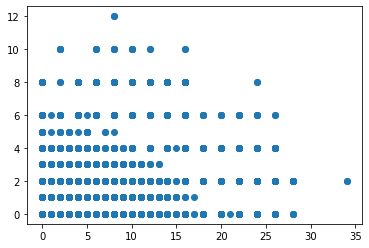

In [56]:
plt.scatter(data['Blocked Shots'], data['Goals'])

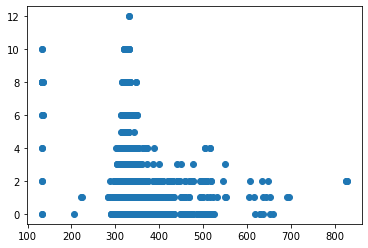

In [57]:
plt.scatter(data['timeOnIce'], data['Goals'])

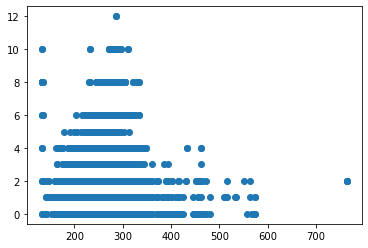

In [58]:
plt.scatter(data['evenTimeOnIce'], data['Goals'])

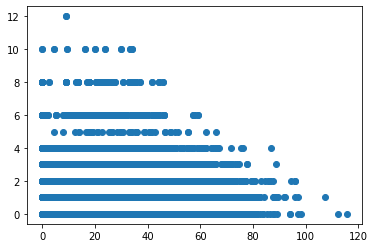

In [59]:
plt.scatter(data['shortHandedTimeOnIce'], data['Goals'])

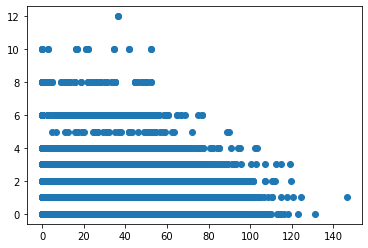

In [60]:
plt.scatter(data['powerPlayTimeOnIce'], data['Goals'])

## 2.9 Check Correlations among Variables

<b>Correlation Matrix</b>

In [61]:
data.corr()

,game_id,won,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,Shots,Goals,Takeaways,Hits,Blocked Shots,Giveaways,Missed Shots,Penalties,#Won Faceoffs,team_id,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
game_id,1.000000,0.035644,-0.282438,-0.344464,-0.092177,-0.001894,0.789341,0.196113,0.619095,0.748870,0.720520,0.656967,0.695786,-0.026590,0.819437,0.121623,0.112091,0.377174,-0.319603,-0.320469
won,0.035644,1.000000,-0.040227,0.014062,0.240841,0.030458,0.029922,0.267319,0.033402,0.007485,0.017686,0.018816,0.025583,-0.021170,0.029584,-0.000703,-0.061166,-0.014458,0.027570,-0.046924
pim,-0.282438,-0.040227,1.000000,0.290553,0.125405,-0.008734,-0.241420,-0.021400,-0.196892,-0.206042,-0.203386,-0.206228,-0.213437,0.394495,-0.226532,-0.043878,-0.219767,-0.473268,0.531016,0.233581
powerPlayOpportunities,-0.344464,0.014062,0.290553,1.000000,0.416509,0.045235,-0.263063,-0.021325,-0.237199,-0.290760,-0.281181,-0.233411,-0.236607,0.180387,-0.279389,-0.031550,-0.102416,-0.699932,0.291013,0.921583
powerPlayGoals,-0.092177,0.240841,0.125405,0.416509,1.000000,0.024805,-0.073169,0.207833,-0.062641,-0.089320,-0.078443,-0.066697,-0.073773,0.080296,-0.063443,-0.014150,-0.062207,-0.211148,0.141829,0.209274
faceOffWinPercentage,-0.001894,0.030458,-0.008734,0.045235,0.024805,1.000000,0.056749,-0.002061,0.028990,0.003427,-0.043485,0.044582,0.054245,-0.012978,0.278906,0.011705,0.006001,-0.000322,-0.031744,0.032160
Shots,0.789341,0.029922,-0.241420,-0.263063,-0.073169,0.056749,1.000000,0.229203,0.635037,0.733889,0.672977,0.652551,0.728890,0.005041,0.841162,0.105719,0.094385,0.309062,-0.288510,-0.239397
Goals,0.196113,0.267319,-0.021400,-0.021325,0.207833,-0.002061,0.229203,1.000000,0.213079,0.184680,0.202165,0.201851,0.187022,0.065262,0.280259,0.035985,-0.050998,0.026876,-0.018791,-0.074814
Takeaways,0.619095,0.033402,-0.196892,-0.237199,-0.062641,0.028990,0.635037,0.213079,1.000000,0.588349,0.557075,0.567010,0.559351,0.025349,0.642733,0.091135,0.071765,0.259931,-0.220695,-0.225042
Hits,0.748870,0.007485,-0.206042,-0.290760,-0.089320,0.003427,0.733889,0.184680,0.588349,1.000000,0.703145,0.650616,0.641033,0.023764,0.765339,0.097920,0.128556,0.329618,-0.258975,-0.270850


<b>Correlation Heatmap</b>

<AxesSubplot:>

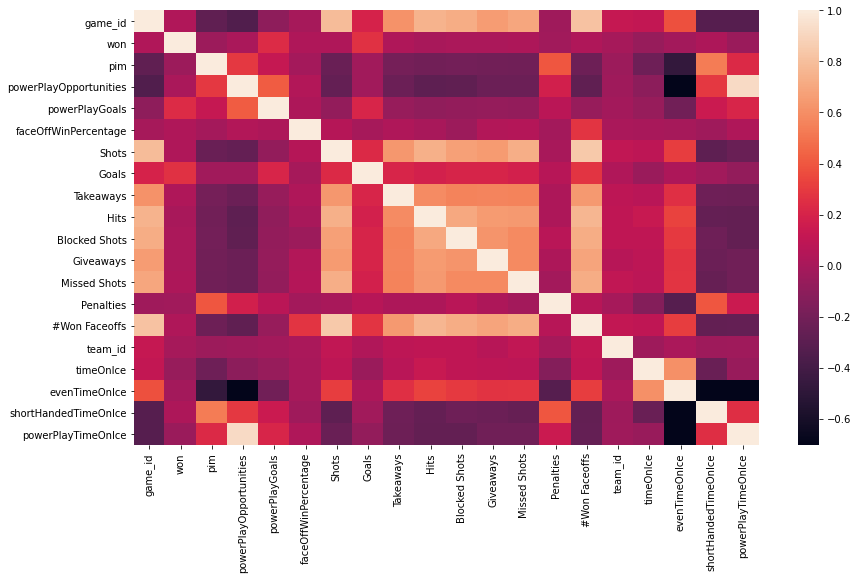

In [62]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr())

<b>Rename some variables to keep naming conventions consistent<b/>

In [63]:
data = data.rename(columns={"game_id": "gameID","HoA":"hoa","settled_in":"settledIn","head_coach":"headCoach",
                            "Shots":"shots","Goals":"goals","Takeaways":"takeaways","Hits":"hits",
                             "Blocked Shots":"blockedShots","Giveaways":"giveaways","Missed Shots":"missedShots",
                             "#Won Faceoffs":"wonFaceoffs","team_id":"teamID",
                             "goalie_replacement":"goalieReplacement","Penalties":"penalties"})

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameID                  52610 non-null  int64  
 1   hoa                     52610 non-null  object 
 2   won                     52610 non-null  bool   
 3   settledIn               52610 non-null  object 
 4   headCoach               52582 non-null  object 
 5   pim                     52602 non-null  float64
 6   powerPlayOpportunities  52602 non-null  float64
 7   powerPlayGoals          52602 non-null  float64
 8   faceOffWinPercentage    30462 non-null  float64
 9   startRinkSide           50218 non-null  object 
 10  shots                   52610 non-null  float64
 11  goals                   52610 non-null  float64
 12  takeaways               52610 non-null  float64
 13  hits                    52610 non-null  float64
 14  blockedShots            52610 non-null